## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington

## EDA
#### Important Prequisite: Must have file ready before proceeding
<li>Use notebook "data_prep.ipynb" to process source data files</li>
<li> Generate one central location for data used below </li>
<li>File needed: "/Datasets/homeless_camp_closed_all.csv" </li>

In [1]:
import pandas as pd
import matplotlib as plt
from datetime import datetime

In [2]:
df  = pd.read_csv("../Datasets/homeless_camp_closed_all.csv", low_memory=False)      # from CSV


In [4]:
#print(df.tail())       # Last 5 rows
print(df.shape)        # (rows, columns)
#print(df.columns)      # List of column names


(322186, 34)


In [5]:
print(df.info())       # Summary of the DataFrame (types, non-null counts)
#print(df.describe())   # Basic statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322186 entries, 0 to 322185
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SRNumber                   322186 non-null  object 
 1   CreatedDate                322186 non-null  object 
 2   UpdatedDate                322186 non-null  object 
 3   ActionTaken                322186 non-null  object 
 4   Owner                      322186 non-null  object 
 5   RequestType                322186 non-null  object 
 6   Status                     322186 non-null  object 
 7   RequestSource              322186 non-null  object 
 8   CreatedByUserOrganization  274036 non-null  object 
 9   MobileOS                   166337 non-null  object 
 10  Anonymous                  322186 non-null  object 
 11  AssignTo                   322119 non-null  object 
 12  ServiceDate                316993 non-null  object 
 13  ClosedDate                 32

In [14]:
#Validate we only have homeless encampment types
status_counts = df["RequestType"].value_counts()
print(status_counts)

RequestType
Homeless Encampment    322186
Name: count, dtype: int64


In [13]:
#Validate we only have closed tickets
status_counts = df["Status"].value_counts()
print(status_counts)

Status
Closed    322186
Name: count, dtype: int64


In [16]:
#Explore other values
action_counts = df["ActionTaken"].value_counts()
print (action_counts)

ActionTaken
SR Created                321927
SR Updated                   215
Escalate to Supervisor        23
Transferred                   15
Information Provided           5
Status Provided                1
Name: count, dtype: int64


In [17]:
df["PolicePrecinct"].value_counts()             

PolicePrecinct
PACIFIC             26461
NORTH HOLLYWOOD     24248
OLYMPIC             22868
RAMPART             21972
NEWTON              19822
HOLLYWOOD           18825
TOPANGA             18573
WILSHIRE            17944
FOOTHILL            16169
WEST LOS ANGELES    15085
VAN NUYS            14263
NORTHEAST           13846
DEVONSHIRE          13428
MISSION             13339
WEST VALLEY         11935
HOLLENBECK          10894
77TH STREET         10667
CENTRAL              9620
SOUTHWEST            8348
SOUTHEAST            7489
HARBOR               6109
Name: count, dtype: int64

<Axes: xlabel='PolicePrecinct'>

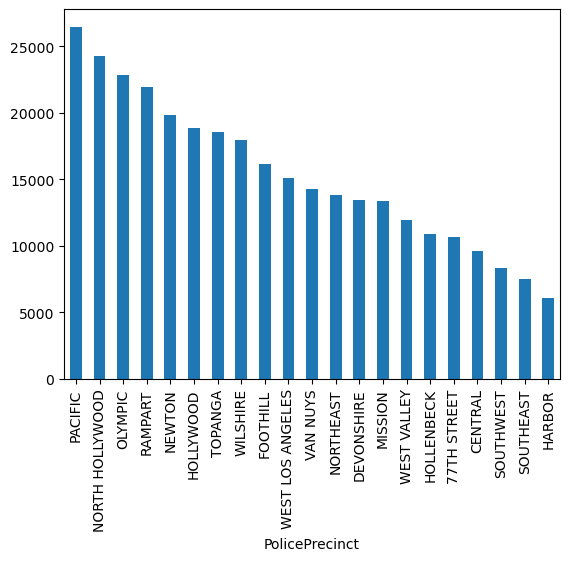

In [27]:
df["PolicePrecinct"].value_counts().plot.bar()  

In [6]:

#print( df["CD"].value_counts()    )
print( df["CDMember"].value_counts()    )
#print( df["NC"].value_counts()    )
print()
print( df["NCName"].value_counts()    )
 

CDMember
Bob Blumenfield            24431
Paul Krekorian             24040
Mitch O'Farrell            22154
Curren D. Price Jr.        21420
Mike Bonin                 19887
Nury Martinez              16166
Paul Koretz                15518
Kevin de León              15368
Monica Rodriguez           14449
John Lee                   12873
Marqueece Harris-Dawson    12678
Gilbert Cedillo            12007
Hugo Soto-Martinez         11983
Nithya Raman               11417
Eunisses Hernandez         10818
Heather Hutt                9321
Traci Park                  9317
Jose Huizar                 8840
Katy Yaroslavsky            8614
David Ryu                   8578
Herb J. Wesson Jr.          7391
Imelda Padilla              5875
Joe Buscaino                5727
Mark Ridley-Thomas          3577
Office of District 10       3217
Tim McOsker                 3103
Vacant                      1513
Greig Smith                 1185
Adrin Nazarian               198
Ysabel J. Jurado             125
M

APC
Central APC              92140
South Valley APC         66115
South Los Angeles APC    47439
North Valley APC         45805
West Los Angeles APC     39794
East Los Angeles APC     23753
Harbor APC                6859
Name: count, dtype: int64


<Axes: xlabel='APC'>

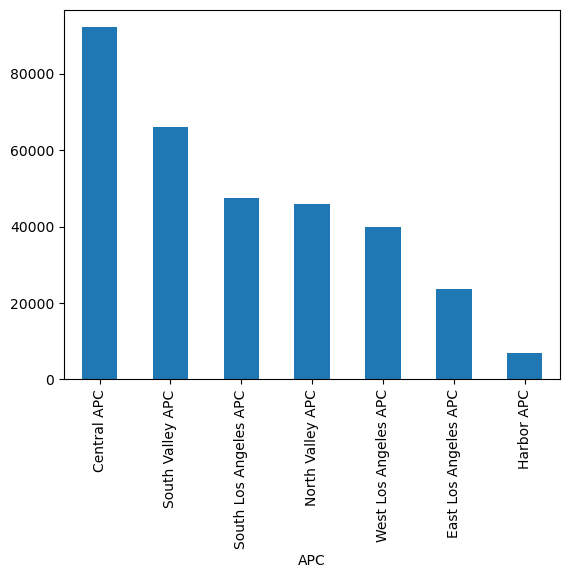

In [28]:
print( df["APC"].value_counts()    )
df["APC"].value_counts().plot.bar()  

In [22]:
df["ClosedDate"].head()

0    01/14/2020 07:51:00 AM
1    01/08/2020 01:42:00 PM
2    01/21/2020 08:49:00 AM
3    01/21/2020 09:05:00 AM
4    01/21/2020 09:10:00 AM
Name: ClosedDate, dtype: object

In [36]:

# Convert string to datetime using strptime
#df['ClosedDate_DT'] = df['ClosedDate'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

df["ClosedDate_DT"] = pd.to_datetime(df["ClosedDate"], format="%m/%d/%Y %H:%M:%S %p")


In [39]:
print ( min(df["ClosedDate_DT"]) )
print ( max(df["ClosedDate_DT"]) )

2019-01-03 01:51:00
2025-01-25 10:15:05


In [41]:

df["CreatedDate_DT"] = pd.to_datetime(df["CreatedDate"], format="%m/%d/%Y %H:%M:%S %p")


In [42]:
print ( min(df["CreatedDate_DT"]) )
print ( max(df["CreatedDate_DT"]) )

2019-01-01 01:05:00
2024-12-31 12:59:16


<Axes: xlabel='CreatedDate_DT'>

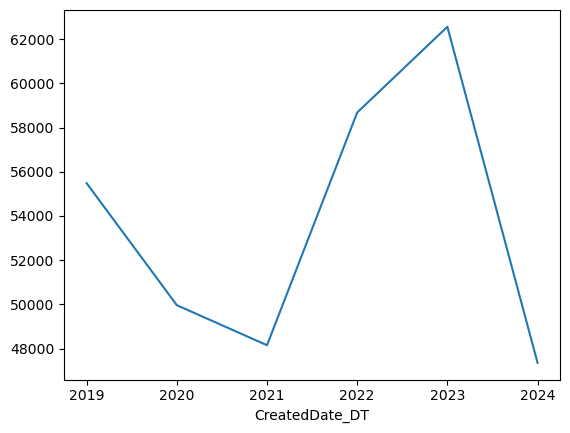

In [47]:
#ax = plt.subplot(111)
#ax.plot(df['CreatedDate_DT'].dt.year, df['Avg'], color='r')
#ax.set_xticks([2015, 2016, 2017])

#plt.show()

df['CreatedDate_DT'].dt.year.value_counts().sort_index().plot.line()

<Axes: xlabel='CreatedDate_DT'>

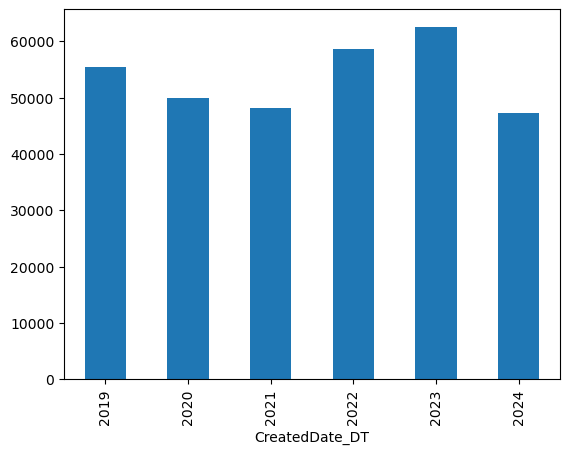

In [48]:

df['CreatedDate_DT'].dt.year.value_counts().sort_index().plot.bar()